In [5]:
# task2.4. Реализовать на базе модели определения пола выявление с другим нормированием (относительно среднего значения). Также добавьте альтернативную функцию активации

In [7]:
#Нормирование данных
import numpy as np

data_w = np.array([133,160,152,120])

data_h = np.array([65,72,70,60])

data = np.hstack([
np.apply_along_axis(lambda x: x - data_w.mean(), 0, data_w).reshape(-1,1),
np.apply_along_axis(lambda x: x - data_h.mean(), 0, data_h).reshape(-1,1)
])

data

array([[ -8.25,  -1.75],
       [ 18.75,   5.25],
       [ 10.75,   3.25],
       [-21.25,  -6.75]])

In [12]:

#import numpy as np

def th(x):
  # Th activation function: f(x) = (e^x - e^(-x))/(e^x + e^(-x))
  return  (np.exp(x) - np.exp(-x))/(np.exp(x) + np.exp(-x))

def deriv_th(x):
  fx = th(x)
  return 1 - np.power(fx,2)

def mse_loss(y_true, y_pred):
  # y_true and y_pred are numpy arrays of the same length.
  return ((y_true - y_pred) ** 2).mean()

class OurNeuralNetwork:

  def __init__(self):
    # Weights
    self.w1 = np.random.normal()
    self.w2 = np.random.normal()
    self.w3 = np.random.normal()
    self.w4 = np.random.normal()
    self.w5 = np.random.normal()
    self.w6 = np.random.normal()

    # Biases
    self.b1 = np.random.normal()
    self.b2 = np.random.normal()
    self.b3 = np.random.normal()

  def feedforward(self, x):
    # x is a numpy array with 2 elements.
    h1 = th(self.w1 * x[0] + self.w2 * x[1] + self.b1)
    h2 = th(self.w3 * x[0] + self.w4 * x[1] + self.b2)
    o1 = th(self.w5 * h1 + self.w6 * h2 + self.b3)
    return o1

  def train(self, data, all_y_trues):
    learn_rate = 0.1
    epochs = 1000 # number of times to loop through the entire dataset

    for epoch in range(epochs):
      for x, y_true in zip(data, all_y_trues):
        # --- Do a feedforward (we'll need these values later)
        sum_h1 = self.w1 * x[0] + self.w2 * x[1] + self.b1
        h1 = th(sum_h1)

        sum_h2 = self.w3 * x[0] + self.w4 * x[1] + self.b2
        h2 = th(sum_h2)

        sum_o1 = self.w5 * h1 + self.w6 * h2 + self.b3
        o1 = th(sum_o1)
        y_pred = o1

        # --- Calculate partial derivatives.
        # --- Naming: d_L_d_w1 represents "partial L / partial w1"
        d_L_d_ypred = -2 * (y_true - y_pred)

        # Neuron o1
        d_ypred_d_w5 = h1 * deriv_th(sum_o1)
        d_ypred_d_w6 = h2 * deriv_th(sum_o1)
        d_ypred_d_b3 = deriv_th(sum_o1)

        d_ypred_d_h1 = self.w5 * deriv_th(sum_o1)
        d_ypred_d_h2 = self.w6 * deriv_th(sum_o1)

        # Neuron h1
        d_h1_d_w1 = x[0] * deriv_th(sum_h1)
        d_h1_d_w2 = x[1] * deriv_th(sum_h1)
        d_h1_d_b1 = deriv_th(sum_h1)

        # Neuron h2
        d_h2_d_w3 = x[0] * deriv_th(sum_h2)
        d_h2_d_w4 = x[1] * deriv_th(sum_h2)
        d_h2_d_b2 = deriv_th(sum_h2)

        # --- Update weights and biases
        # Neuron h1
        self.w1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w1
        self.w2 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_w2
        self.b1 -= learn_rate * d_L_d_ypred * d_ypred_d_h1 * d_h1_d_b1

        # Neuron h2
        self.w3 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w3
        self.w4 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_w4
        self.b2 -= learn_rate * d_L_d_ypred * d_ypred_d_h2 * d_h2_d_b2

        # Neuron o1
        self.w5 -= learn_rate * d_L_d_ypred * d_ypred_d_w5
        self.w6 -= learn_rate * d_L_d_ypred * d_ypred_d_w6
        self.b3 -= learn_rate * d_L_d_ypred * d_ypred_d_b3

      # --- Calculate total loss at the end of each epoch
      if epoch % 50 == 0:
        y_preds = np.apply_along_axis(self.feedforward, 1, data)
        loss = mse_loss(all_y_trues, y_preds)
        print("Epoch %d loss: %.3f" % (epoch, loss))

all_y_trues = np.array([
  1, # Alice
  0, # Bob
  0, # Charlie
  1, # Diana
])

# Train our neural network!
network = OurNeuralNetwork()
network.train(data, all_y_trues)

# Make some predictions
emily = np.array([128 - data_w.mean(), 63 - data_h.mean()]) # 128 pounds, 63 inches
frank = np.array([155 - data_w.mean(), 68 - data_h.mean()])  # 155 pounds, 68 inches
print("Emily: %.3f" % network.feedforward(emily)) # 0.951 - F
print("Frank: %.3f" % network.feedforward(frank)) # 0.039 - M

Epoch 0 loss: 0.477
Epoch 50 loss: 0.001
Epoch 100 loss: 0.001
Epoch 150 loss: 0.000
Epoch 200 loss: 0.000
Epoch 250 loss: 0.000
Epoch 300 loss: 0.000
Epoch 350 loss: 0.000
Epoch 400 loss: 0.000
Epoch 450 loss: 0.000
Epoch 500 loss: 0.000
Epoch 550 loss: 0.000
Epoch 600 loss: 0.000
Epoch 650 loss: 0.000
Epoch 700 loss: 0.000
Epoch 750 loss: 0.000
Epoch 800 loss: 0.000
Epoch 850 loss: 0.000
Epoch 900 loss: 0.000
Epoch 950 loss: 0.000
Emily: 0.989
Frank: -0.000


In [13]:
# task2.5. Реализовать решение уровнения через градиентный спуск: x**2+2x-6

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

Координата x в минимуме параболы равна -1.0


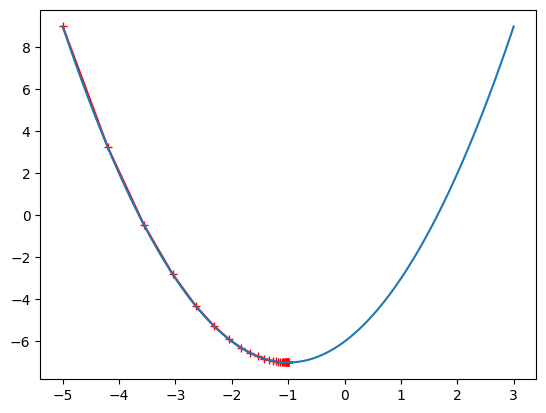

In [27]:
o = np.linspace(-5,3,100)

def p(x):
    return x**2 + 2*x - 6 

def g(x):
    return 2*x +2
fx = p(o)

x = -5
 # Записываем точку каждого падения градиента
history_x=[x]
i_iter=0.1
 # Скорость обучения
learn_rate = 0.1
 # Выполнить градиентную итерацию
while i_iter < 1e4:
    i_iter += 0.1
    dj = g(x)
    last_x = x
    x = x - learn_rate * dj
    history_x.append(x)

    if abs(p(x) - p(last_x)) < 0.000001 :
        break
history_y = p(np.array(history_x))  

plt.plot(history_x, history_y,color='r', marker='+')
plt.plot(o, fx)

print(f'Координата x в минимуме параболы равна {round(x, 1)}')

In [ ]:
#task 2.6(дополнительно) Реализовать решение уровнения через градиентный спуск: x**3+2x**2-6x-1

-4.26
-4.574027999999999
-4.958718844343519
-5.438036867887204
-6.04768274246673
-6.843009429373958
-7.914092393714027
-9.416514450452732
-11.639976204302176
-15.179048537231715
-21.423992030611537


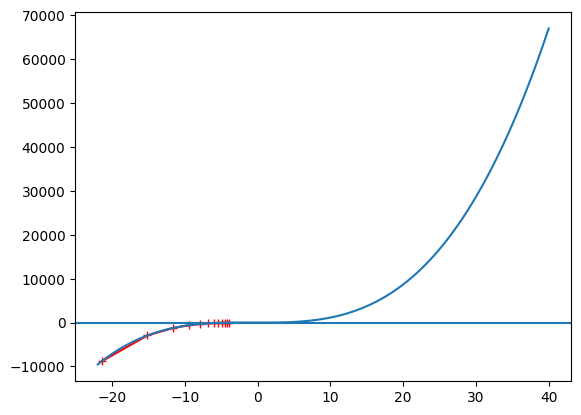

In [84]:
o = np.linspace(-20,40,100)

def p(x):
    return x**3 + 2*x**2 - 6*x -1

def g(x):
    return 3*(x**2) + 4*x - 6

def deriv_g(x):
    return 6*x + 4
fx = p(o)

x = -4
 # Записываем точку каждого падения градиента
history_x=[x]
i_iter=0.1
 # Скорость обучения
learn_rate = 0.01
 # Выполнить градиентную итерацию
while i_iter < 1e4:
    i_iter += 0.1
    dj = g(x)
    last_x = x
    if x < o[0]:
        break
    x = x - learn_rate * dj
    history_x.append(x)

         # Если итерация достигнута точно, расчет завершен
    print(x)
    if abs(p(x) - p(last_x)) < 0.000001 :
        break

history_y = p(np.array(history_x))    

plt.plot(history_x, history_y,color='r', marker='+')
plt.plot(np.linspace(-22,40,100), p(np.linspace(-22,40,100)))

plt.axhline(0)

2.7

Наилучший результат CNN показал при увеличении кол-ва фильтров (32,64), 2 слоя свертки, функция активации в сверточных слоях : 'selu',
активация в полносвязном слое : 'tanh', кол-во нейронов : 1024, dropout 0.3, кол-во эпох : 8, val_accuracy 0.98